In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_artists = pd.read_csv('1/data/Artists.csv')
df_artworks = pd.read_csv('1/data/Artworks.csv')

# 1. Exploring the data

it's always a good idea to have a sense of our data size using `.shape`



In [3]:
print(df_artists.shape, df_artworks.shape)

(15222, 9) (138151, 29)


Also let's take a look in the data...

In [4]:
df_artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [5]:
df_artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


## 1.1 missing values

I can already see that I need to deal with `missing values`. There are`NaN`s in the data, but is that all? I have to make sure that non-nan  values are valid. 

One way to do that, is to make sure that each column has the datatype that I expect. For example, numeric columns should have a numeric datatype.

In [6]:
df_artists.dtypes

ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
dtype: object

In [7]:
df_artworks.dtypes

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ThumbnailURL           object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

Now I know that numeric columns have `float64`, which is what I expected. However, `BeginDate` and `EndDate` could be also `int`. The problem is that they have `()` around values (other columns have that as well). I will remove reduntant `()` from 'ArtistBio', 'Nationality', 'BeginDate', 'EndDate', and 'Gender'.

In [8]:
sel_cols = ['ArtistBio', 'Nationality', 'BeginDate', 'EndDate', 'Gender']

# substrings to be removed from columns
pattern = '|'.join(['\(', '\)'])

df_artworks[sel_cols] = df_artworks[sel_cols].replace(pattern, '', regex=True)

In [9]:
df_artworks.dtypes

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ThumbnailURL           object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

Even after removing unwanted characters, those columns are still `object`. I need to `cast` their type. Even though `int` works here, since they are date columns, I prefer to change their type to `datetime`.

**It goes a long way if you practice using datetime in python.**

Another powerful command is `apply` when working with pandas dataframes.

In [10]:
sel_cols = ['BeginDate', 'EndDate', 'Date']
df_artworks[sel_cols].apply(pd.to_datetime, format='%Y')

ValueError: unconverted data remains:  0

#### Don't panick!

Errors are useful! you want to get errors, then try to understand why you got them!

Here, I understand there is an issue in converting values to date. since i used a particular format `%Y`, it expects to see year in the format of `yyyy`. 
Usually in converting datatypes, you'll see similar errors. oneway, is to `coerce` the conversion and remove values that don't follow the expected pattern. 

In [11]:
df_artworks[sel_cols] = df_artworks[sel_cols].apply(pd.to_datetime, 
                                                    format='%Y',
                                                   errors='coerce')
# checking the converted values. pay attention to NaT!
df_artworks[sel_cols].head()

,BeginDate,EndDate,Date
0,1841-01-01,1918-01-01,1896-01-01
1,1944-01-01,NaT,1987-01-01
2,1876-01-01,1957-01-01,1903-01-01
3,1944-01-01,NaT,1980-01-01
4,1876-01-01,1957-01-01,1903-01-01


the conversion changed the yyyy to yyyy-mm-dd. I only want the year...

In [12]:
df_artworks[sel_cols] = df_artworks[sel_cols].apply(lambda x: x.dt.year, axis=0)

In [13]:
df_artworks[sel_cols].head()

,BeginDate,EndDate,Date
0,1841.0,1918.0,1896.0
1,1944.0,NaN,1987.0
2,1876.0,1957.0,1903.0
3,1944.0,NaN,1980.0
4,1876.0,1957.0,1903.0


Now I need to do the same thing for Artists dataframe.
Also when working with selected columns, I use a vairable called `sel_cols`. This is just my preference. you can use other variables, with different names...

In [14]:
sel_cols = ['BeginDate', 'EndDate']
df_artworks[sel_cols] = df_artworks[sel_cols].apply(pd.to_datetime, 
                                                    format='%Y',
                                                   errors='coerce')

df_artworks[sel_cols] = df_artworks[sel_cols].apply(lambda x: x.dt.year, axis=0)
df_artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"Austrian, 1841–1918",Austrian,1841.0,1918.0,Male,1896.0,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"French, born 1944",French,1944.0,NaN,Male,1987.0,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876.0,1957.0,Male,1903.0,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"French and Swiss, born Switzerland 1944",,1944.0,NaN,Male,1980.0,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876.0,1957.0,Male,1903.0,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


since I needed to do the same transformation on both datasets, I'd turn those steps to a function, in case I need to use it again.

Also it gives me the idea that for the future transformation, maybe start with a function right away...

In [15]:
def date_conversion(date_columns, df, date_format='%Y'):

    df[date_columns] = df[date_columns].apply(pd.to_datetime,
                                              format=date_format,
                                              errors='coerce')

    df[date_columns] = df[date_columns].apply(lambda x: x.dt.year, axis=0)
    print("converted date columns.")
    return df

It is redundant now but just to demonstrate how this function works...

In [16]:
df_artists = date_conversion(sel_cols, df_artists)

converted date columns.


now let's finally check the ratio of missing values

In [17]:
print("% of missing values in Artists dataset")
100 * df_artists.isnull().sum(axis = 0)/ len(df_artists)

% of missing values in Artists dataset


ConstituentID     0.000000
DisplayName       0.000000
ArtistBio        14.485613
Nationality      16.108264
Gender           20.634608
BeginDate        24.136119
EndDate          66.949153
Wiki QID         78.616476
ULAN             80.731836
dtype: float64

In [18]:
print("% of missing values in Artworks dataset")
100 * df_artworks.isnull().sum(axis = 0)/ len(df_artworks)

% of missing values in Artworks dataset


Title                   0.028230
Artist                  0.928694
ConstituentID           0.928694
ArtistBio               4.288785
Nationality             0.928694
BeginDate              12.236611
EndDate                39.710896
Gender                  0.928694
Date                   35.906363
Medium                  7.022027
Dimensions              7.060390
CreditLine              1.764012
AccessionNumber         0.000000
Classification          0.000000
Department              0.000000
DateAcquired            5.157400
Cataloged               0.000000
ObjectID                0.000000
URL                    36.892241
ThumbnailURL           44.691678
Circumference (cm)     99.992762
Depth (cm)             89.982700
Diameter (cm)          98.941738
Height (cm)            12.881557
Length (cm)            99.462907
Weight (kg)            99.790085
Width (cm)             13.548219
Seat Height (cm)      100.000000
Duration (sec.)        98.450970
dtype: float64

**Not all missing values are created equal!**

While expect some columns to always have a value (and otherwise it is a data qulaity issue), some missing values are fine. For example, not all artworks should have `Duration`.
So it is important to know your data before making a decision on the best `imputation` strategy.

Sidenote: I really like this library called `missingno`. It's a great visual tool to see patterns in missing values in your data. let's try it!

In [19]:
!pip install missingno

<AxesSubplot:>

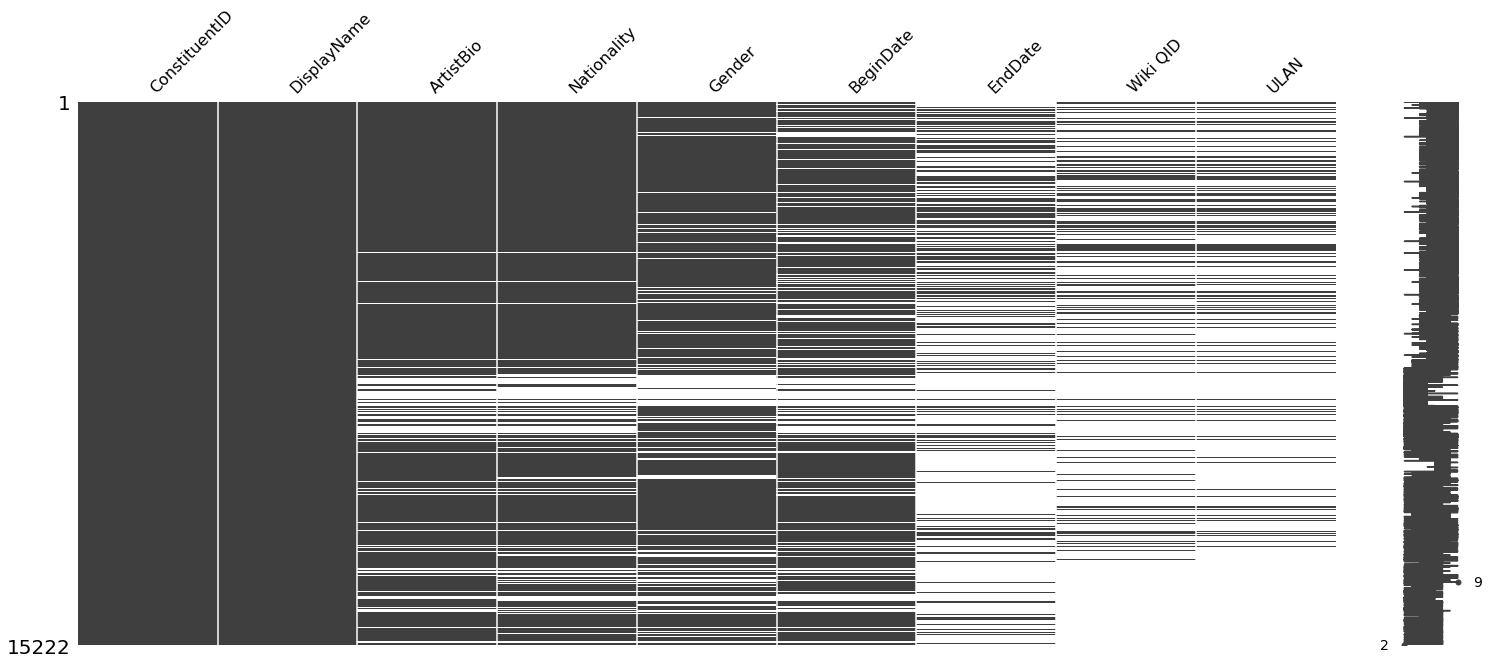

In [20]:
import missingno as msno
%matplotlib inline

msno.matrix(df_artists)

## 1.2 Categorical and Numerical data quality

Now that I have an idea on the missing values, I want to check the the existing values.
In particular, I want to make sure there is nothing strange in the numerical columns (checking ofr outliers, summary statistics, etc), and the groups in categorical columns make sense.

In [21]:
df_artists.dtypes

ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate        float64
EndDate          float64
Wiki QID          object
ULAN             float64
dtype: object

In [22]:
num_cols_artists = df_artists.select_dtypes('float64').columns

df_artists[num_cols_artists].describe()

,BeginDate,EndDate,ULAN
count,11548.000000,5031.000000,2.933000e+03
mean,1930.626429,1976.632081,5.000744e+08
std,34.634359,31.547730,8.658297e+04
min,1730.000000,1795.000000,5.000000e+08
25%,1909.000000,1960.000000,5.000176e+08
50%,1936.000000,1983.000000,5.000331e+08
75%,1955.000000,2001.000000,5.001146e+08
max,2017.000000,2020.000000,5.003566e+08


min and max values for date columns makes sense. Let's visualize them.

ULAN is just an ID column and probably there is nothing  I can learn from it. So I'm going to drop it.

In [23]:
num_cols_artists = num_cols_artists.drop('ULAN')

/Users/Amiros/opt/anaconda3/envs/pratt_ml/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Amiros/opt/anaconda3/envs/pratt_ml/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


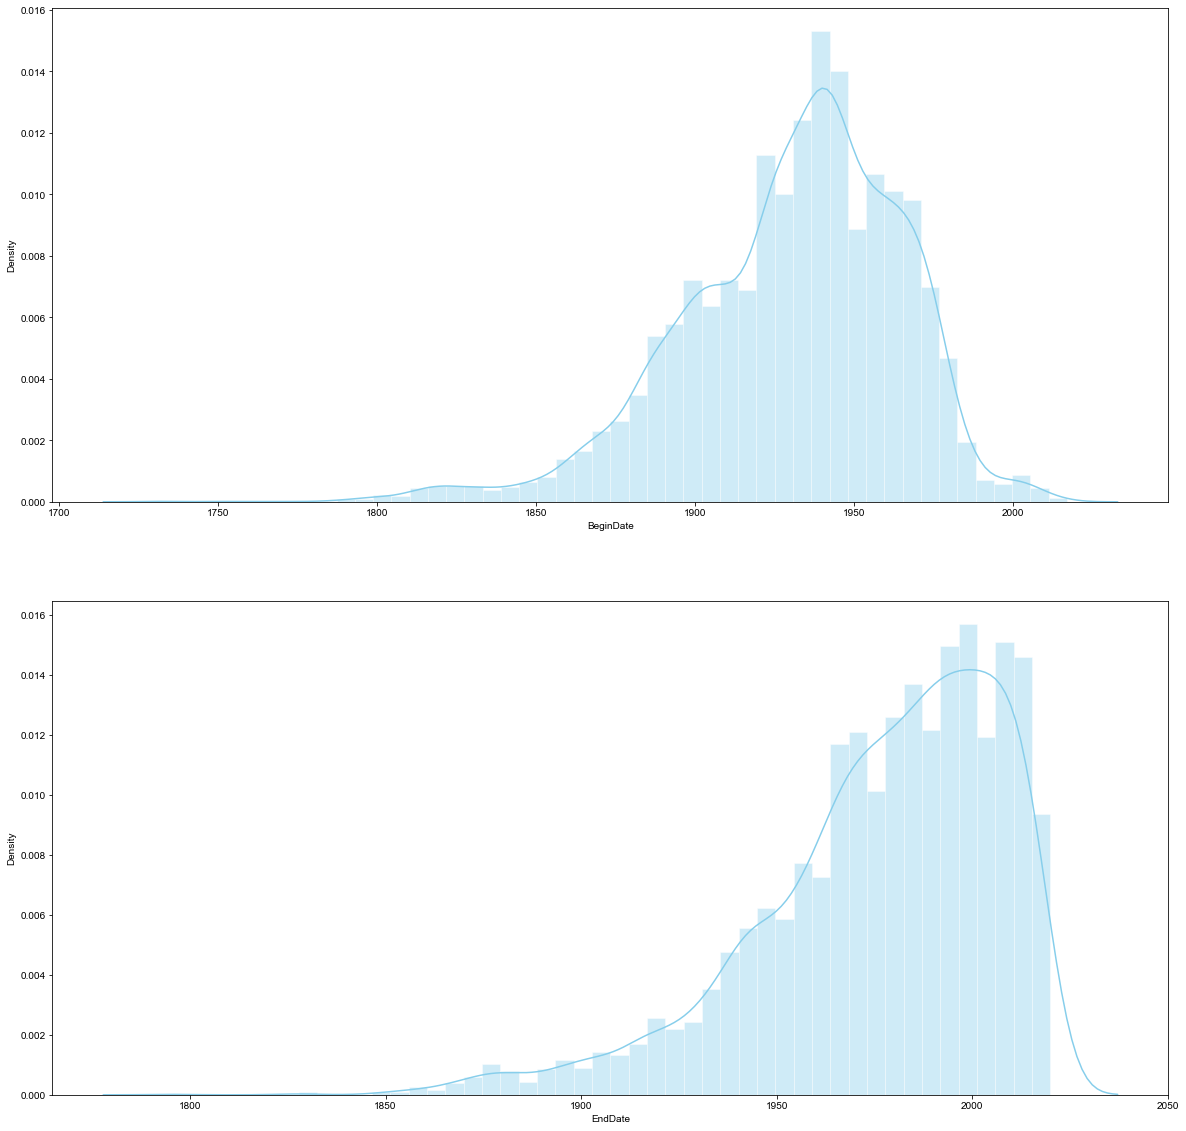

In [24]:
f, axes = plt.subplots(len(num_cols_artists), 1, figsize=(20, 20))
for ax, col in zip(axes.flat, num_cols_artists):
    sns.set(font_scale = 2)
    sns.distplot(df_artists[col] , color="skyblue", ax=ax)

I also like to find out if there are any cases where `BeginDate` > `EndDate`. That's another check for data quality for this data set.

In [25]:
df_artists[df_artists['BeginDate'] > df_artists['EndDate']]

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN


Great! the date columns make sense.

You should do the same for the other dataframe. From this point, I'll only use one dataframe for demo purposes.

----

Now let's check the values for categorical columns

In [26]:
cat_cols_artists = df_artists.select_dtypes('object').columns

for col in ['Nationality', 'Gender']:
    print(df_artists[col].value_counts())

American      5194
German         969
British        854
French         848
Italian        539
              ... 
Afghan           1
Cambodian        1
Tanzanian        1
Cypriot          1
Salvadoran       1
Name: Nationality, Length: 118, dtype: int64
Male          9762
Female        2300
male            15
Non-Binary       2
female           1
Non-binary       1
Name: Gender, dtype: int64


I see here that there are slight variations in the way gender is recorded. Overall, when dealing with text data, it is a good idea to **lower case** everythin and sometimes remove special characters like punctuations (not here though!).

In [27]:
df_artists[cat_cols_artists] = df_artists[cat_cols_artists].apply(lambda x: x.str.lower(), axis=1)

# 2. Analysis
After exploring the data and taking neccsary cleaning/prep steps, I can do some analysis.


## 2.2 Some Data Viz

Based on what question you are interested in to explore, you can visualize the data. Here are a few examples:

Text(0.5, 1.0, 'MoMA Artists by Nationality')

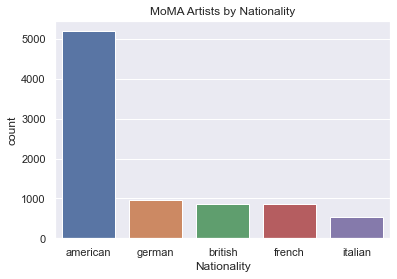

In [28]:
# Top 5 nationality of artists
sns.set(font_scale = 1)
ax = sns.countplot(x="Nationality",
                   data=df_artists,
                   order=df_artists['Nationality'].value_counts().iloc[:5].index
                  )
plt.title("MoMA Artists by Nationality")


Text(0.5, 1.0, 'MoMA Artists by Nationality - Gender breakdown')

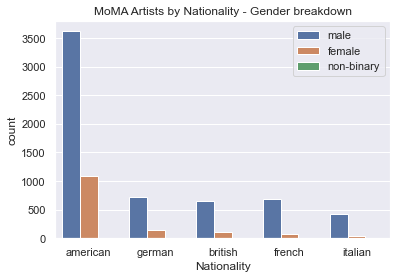

In [29]:
# Top 5 nationality of artists - breakdown by gender
ax = sns.countplot(x="Nationality",
                   data=df_artists,
                   hue="Gender",
                   order=df_artists['Nationality'].value_counts().iloc[:5].index
                  )
plt.legend(loc='upper right')
plt.title("MoMA Artists by Nationality - Gender breakdown")



Text(0.5, 1.0, 'MoMA living Artists by Nationality')

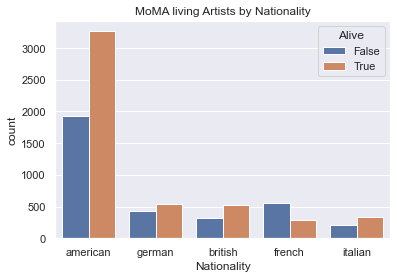

In [30]:
# Intersting analysis from Chelsea's:
# Find if an artist is alive
alive_condition = df_artists['EndDate'].isna()
df_artists['Alive'] = np.where(alive_condition, True, False)


# Top 5 nationality of alive artists 
ax = sns.countplot(x="Nationality",
                   data=df_artists,
                   hue="Alive",
                   order=df_artists['Nationality'].value_counts().iloc[:5].index
                  )
plt.title("MoMA living Artists by Nationality")

## 2.1 Merging datasets

If you want to merge these two dataframes with each other, you can use `ConstituentID` as the `key`.
There different types of merging (left, right, outer, inner, full). read about them [here](https://towardsdatascience.com/all-the-pandas-merge-you-should-know-for-combining-datasets-526b9ecaf184)

In [31]:
df_merged = pd.merge(df_artworks, df_artists,
                     on='ConstituentID',
                     how='left')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

Another error! again, errors are just fine!
this error tells me that the `constituentID` is `string` in my `df_artworks` dataframe. in particular, the first time it encounters that problem is at row 64. Let's have a look at row 64 +1 (including header)

In [32]:
df_artworks.iloc[65:67, :]

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
65,"House IV Project, Falls Village, Connecticut (...","Peter Eisenman, Robert Cole","6969, 8134","American, born 1932",American,NaN,NaN,Male Male,1975.0,Ink and color ink on frosted polymer sheet,...,http://www.moma.org/media/W1siZiIsIjIxMDA0MSJd...,NaN,NaN,NaN,34.9251,NaN,NaN,113.3477,NaN,NaN
66,"Villa dall'Ava, Paris (Saint-Cloud), France, E...","Rem Koolhaas, Madelon Vriesendorp","6956, 6957","Dutch, born 1944 Dutch, born 1945",Dutch Dutch,NaN,NaN,Male Female,1987.0,Synthetic polymer paint and ink on paper,...,http://www.moma.org/media/W1siZiIsIjYwMTEyIl0s...,NaN,NaN,NaN,63.5001,NaN,NaN,99.0602,NaN,NaN


huh! some artworks have multiple artists. Now I have to decide how I want to handle them. In this case, I would repeat those artworks but in each row I'll have only one ConstituentID.

This is a bit tricky, so I searched `pandas split column by delimiter into multiple rows` and checked stackoverflow answers. [This answer](https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe) looked promising.

In [33]:
# let's remmber how many rows we have
df_artworks.shape[0]

138151

In [34]:
cols = df_artworks.columns.to_list()
cols.remove('ConstituentID')

In [35]:
df_artworks_exp = df_artworks.set_index(cols).apply(lambda x: x.str.split(',').explode()).reset_index()
df_artworks_exp.shape

(153786, 29)

You can see I have about 15K more rows now. The reason is that if an artwork had multiple artists, I have made multiple rows for each artist. Remeber, this is only one way of dealing with this situation.

Now I need to drop some of the columns that have artists information (like bio, gender, nationality) from the exploded dataframe because I want to merge it with df_artists using the `ConsitituentID` and then my data will have correct information about individual artists.

In [36]:
df_artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN', 'Alive'],
      dtype='object')

In [37]:
drop_cols = ['ArtistBio', 'Gender', 'Nationality',
            'BeginDate', 'EndDate']
df_artworks_exp = df_artworks_exp.drop(columns=drop_cols)
df_artworks_exp.shape

(153786, 24)

pay attention that I still have the same number of rows (153786) but 5 less columns.

In [39]:
# now converting data type to integer
df_artworks_exp['ConstituentID'] = pd.to_numeric(df_artworks_exp['ConstituentID'])

In [42]:
df_merged = pd.merge(df_artworks_exp, df_artists,
                     on='ConstituentID',
                     how='left')
df_merged.shape

(153786, 33)

In [43]:
df_merged.head()

,Title,Artist,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,...,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,Alive
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,1896.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,...,6210.0,otto wagner,"austrian, 1841–1918",austrian,male,1841.0,1918.0,q84287,500016971.0,False
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,1987.0,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,...,7470.0,christian de portzamparc,"french, born 1944",french,male,1944.0,NaN,q312838,500024982.0,True
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,1903.0,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,...,7605.0,emil hoppe,"austrian, 1876–1957",austrian,male,1876.0,1957.0,q1336246,500232997.0,False
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,1980.0,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,...,7056.0,bernard tschumi,"french and swiss, born switzerland 1944",NaN,male,1944.0,NaN,q123966,500022322.0,True
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,1903.0,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,...,7605.0,emil hoppe,"austrian, 1876–1957",austrian,male,1876.0,1957.0,q1336246,500232997.0,False


Now that I have artists + artworks data in one place, let's look into how many artworks we have from Ukranian artists (based on Anna's notebook)

In [47]:
df_merged[df_merged.Nationality == 'ukrainian'].shape[0]

165

Let's see if there are any artists with a nationality other than Ukrainian, but who are born in Ukraine. This information is in the Artist Bio column.

But to do so, we need to drop rows without any values in artist bio.

In [53]:
df_merged = df_merged.dropna(subset = ['ArtistBio'])
print(f"# of rows without bio: {153786 - df_merged.shape[0]}")

# of rows without bio: 8471


In [55]:
# number of artworks from artists with Ukranian background!
df_merged[df_merged['ArtistBio'].str.contains('ukrain')].shape[0]

601

we got many more artworks from artists with Ukranian background!

Now as a final example, let's show the break down of those artworks based on gender.

In [63]:
df_ukrain = df_merged[df_merged['ArtistBio'].str.contains('ukrain')]
df_ukrain[['Gender']].value_counts()

Gender
male      458
female    143
dtype: int64